In this homework, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this homework across all problems, use 80%, 20% split.

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [210]:
trainSize = 0.8
testSize = 0.2

In [211]:
#data for training
cancer_df = load_breast_cancer(as_frame = True)
X = cancer_df.data
Y = cancer_df.target
sc_X = StandardScaler()
X.shape
x_train, x_test, y_train, expected = tts(X, Y, train_size = trainSize, test_size = testSize)
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

Problem 1 (40pts):

Use the cancer dataset to build a Naïve Bayesian model to classify the type of cancer (Malignant vs. benign). Plot your classification accuracy, precision, and recall. Explain and elaborate on your results. Can you compare your results against the logistic regression classifier you did in previous homework.


In [212]:
model = GaussianNB()
x_train = model.fit(x_train,y_train)
predicted = model.predict(x_test)
print(model)
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

GaussianNB()
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.92      0.99      0.95        71

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

[[37  6]
 [ 1 70]]


Problem 2 (40pts):

Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy. Plot your classification accuracy, precision, and recall over a different number of Ks. Explain and elaborate on your results.


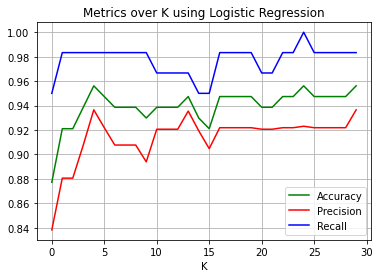

In [213]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state = 0)
K_max = 30
K = np.array(range(K_max))
acc = np.zeros(30)
prec = np.zeros(30)
recall = np.zeros(30)


for k in K:
    pca = PCA(n_components=k+1)
    X_pca = pca.fit_transform(X)
    x_train_pca, x_test_pca, y_train, expected = tts(X_pca, Y, train_size = trainSize, test_size = testSize, random_state=69)
    
    x_train_pca = sc_X.fit_transform(x_train_pca)
    x_test_pca = sc_X.transform(x_test_pca)
    
    logReg.fit(x_train_pca, y_train)
    y_pred = logReg.predict(x_test_pca) # Predictions
    
    acc[k] = metrics.accuracy_score(expected,y_pred)
    prec[k] = metrics.precision_score(expected,y_pred)
    recall[k] = metrics.recall_score(expected,y_pred)
    
plt.plot(K,acc[K], color='green', label='Accuracy')
plt.plot(K,prec[K], color='red', label='Precision')
plt.plot(K,recall[K], color='blue', label='Recall')
plt.grid() 
plt.xlabel('K') 
plt.ylabel('') 
plt.title('Metrics over K using Logistic Regression') 
plt.legend() 

Problem 3 (20pts):

Can you repeat problem 2? This time, replace logistic regression with the Bayes classifier. Report your results (classification accuracy, precision, and recall). Compare your results against problem 2.

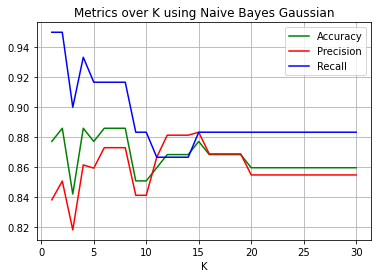

In [214]:
gauss = GaussianNB()
K_max = 30
K = np.array(range(K_max))
acc = np.zeros(30)
prec = np.zeros(30)
recall = np.zeros(30)

for k in K:
    pca = PCA(n_components=k+1)
    X_pca = pca.fit_transform(X)
    x_train_gauss, x_test_gauss, y_train, expected = tts(X_pca, Y, train_size = trainSize, test_size = testSize, random_state=69)
    
    gauss.fit(x_train_gauss, y_train)
    y_pred = gauss.predict(x_test_gauss) # Predictions
    
    acc[k] = metrics.accuracy_score(expected,y_pred)
    prec[k] = metrics.precision_score(expected,y_pred)
    recall[k] = metrics.recall_score(expected,y_pred)
    
plt.plot(K+1,acc[K], color='green', label='Accuracy')
plt.plot(K+1,prec[K], color='red', label='Precision')
plt.plot(K+1,recall[K], color='blue', label='Recall')
plt.grid() 
plt.xlabel('K') 
plt.ylabel('') 
plt.title('Metrics over K using Naive Bayes Gaussian') 
plt.legend() 